In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# ****-------Notebook Summary----***



#Data Read, Data Visualization,EDA Analysis, Data Pre-processing,Data Manipulation,Data Cleaning
#--------------------------------------------------------

#(UnSupervised Machine Learning Algorithm)

#Part1=K-means Clustering or Partition clustering & Hierarchical Clustering or Agglomerative clustering.

#Part2=K-means clustering with different aproch

#Part3 = Multiple unsupervised algorithm( Density-Based Spatial Clustering of Applications with Noise (DBSCAN),....)

# Data Read, Data Visualization,EDA Analysis,Data Pre-Processing,Data Splitting

In [2]:
#Data Read
file_path = '../input/customer-segmentation-tutorial-in-python'
df=pd.read_csv(f'{file_path}/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
s=df.copy()

# Part 1

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = le.fit_transform(df[col])

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
df = df.loc[:,~df.columns.duplicated()]

In [9]:
df=df.sample(frac=1).reset_index(drop=True)

In [10]:
import pandas_profiling

In [11]:
# preparing profile report

profile_report = pandas_profiling.ProfileReport(df,minimal=True)
profile_report

Summarize dataset:   0%|          | 0/14 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [13]:
df.shape

(200, 5)

In [14]:
df.apply(lambda x: sum(x.isnull()),axis=0)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [16]:
df.groupby("Age").mean()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
Age,,,,
18,76.750000,0.750000,51.250000,60.000000
19,97.000000,0.750000,57.000000,39.750000
20,59.200000,0.600000,41.600000,40.200000
21,52.200000,0.200000,38.800000,66.800000
22,36.666667,0.333333,31.333333,70.000000
23,57.833333,0.000000,41.500000,63.333333
24,49.500000,0.500000,39.250000,71.500000
25,100.000000,0.666667,57.666667,39.666667
26,90.000000,1.000000,58.000000,54.500000


<AxesSubplot:>

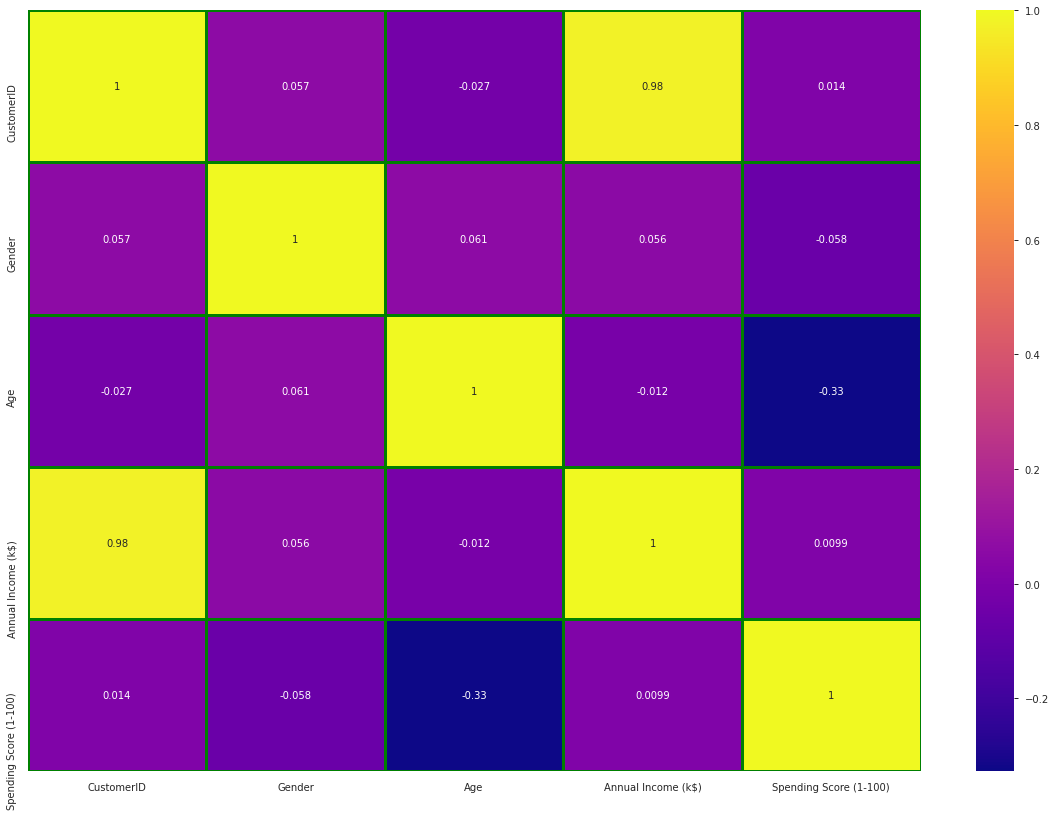

In [17]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,linecolor='green',linewidths=3,cmap = 'plasma')
#Data Cor-Relation

In [18]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Skewness of Data

In [19]:
# the data columns
cols = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']


In [20]:
import scipy.stats as stats
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

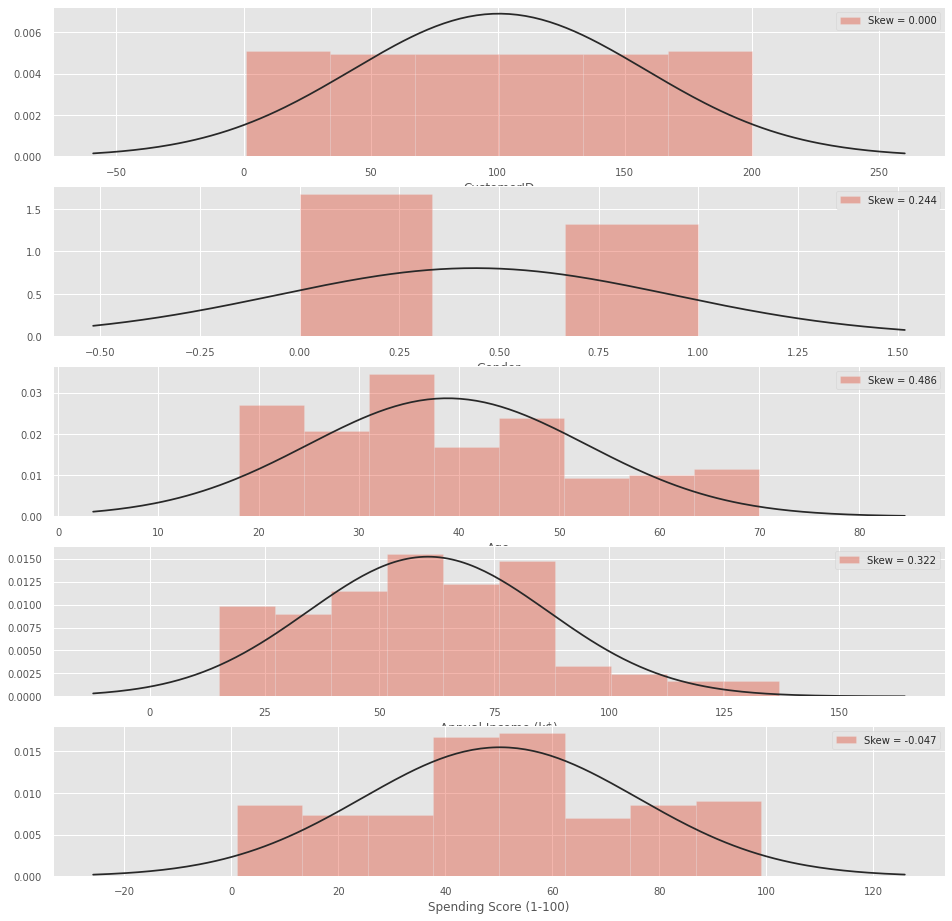

In [21]:
fig,ax = plt.subplots(5,1, figsize=(16, 16))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

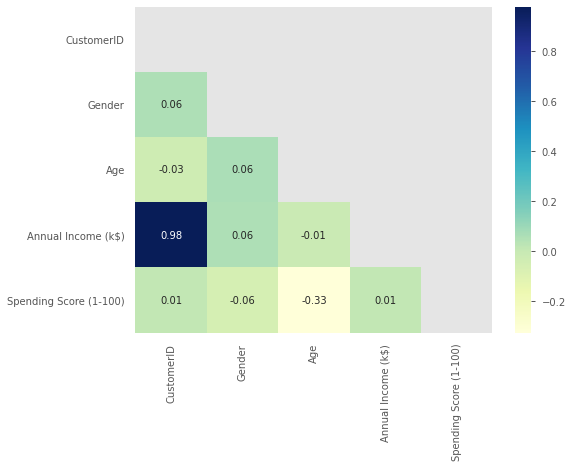

In [22]:
#Correlation Plot
plt.figure(figsize=(8,6))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt= '.2f', cmap='YlGnBu', mask=mask)
plt.show()

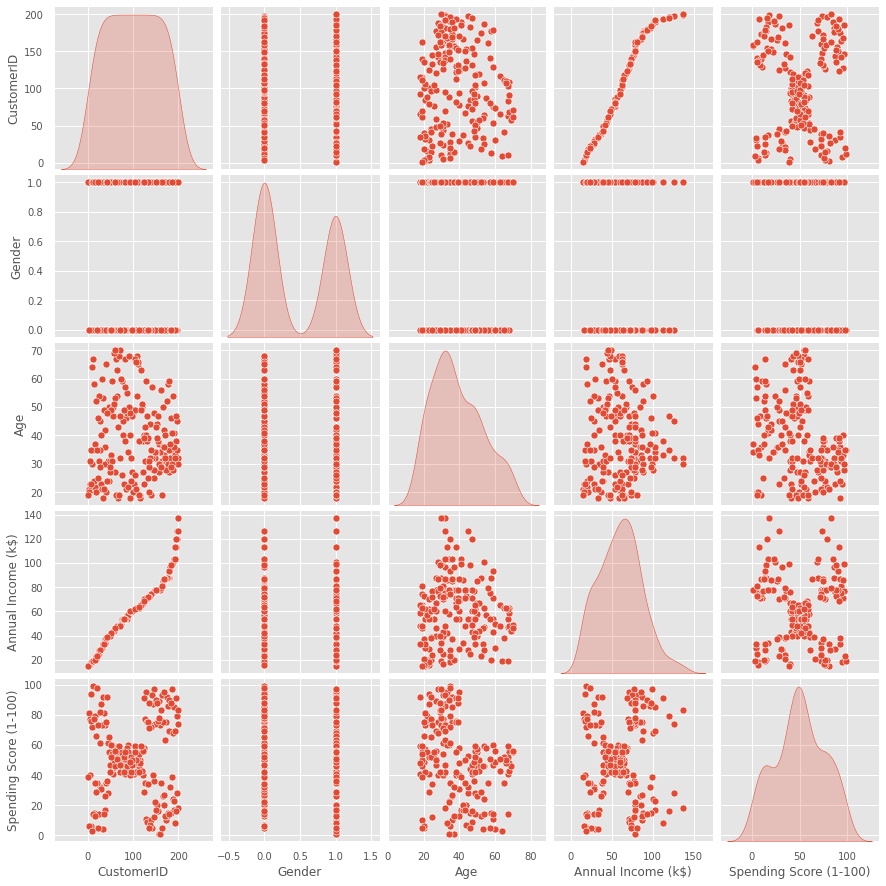

In [23]:
sns.pairplot(df,diag_kind="kde")
plt.show()

Numerical Columns data distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

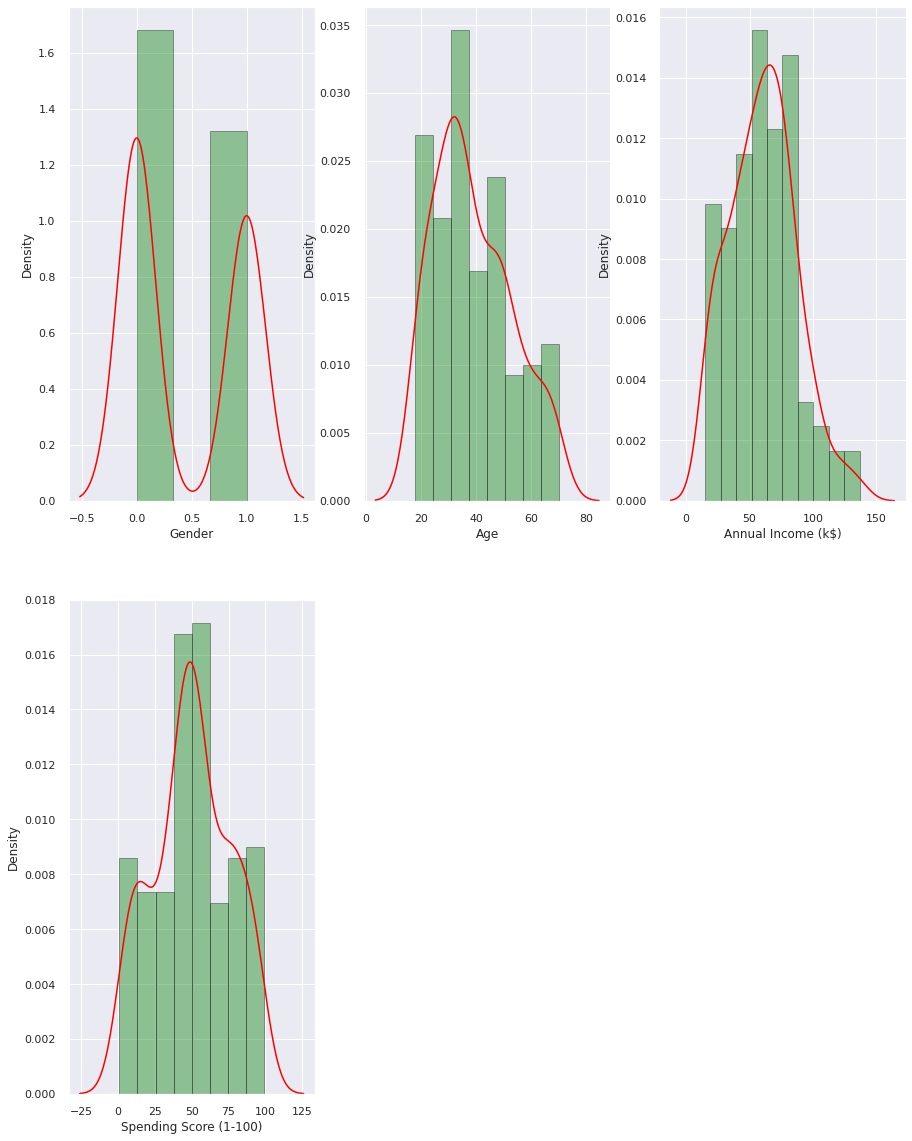

In [24]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cnt = 1
for col in cols :
    plt.subplot(2,3,cnt)
    sns.distplot(df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='green'),color='red')
    cnt+=1
plt.show() 

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# What is clustering?
Clustering is an unsupervized learning technique where you take the entire dataset and find the "groups of similar entities" within the dataset. Hence there is no labels within the dataset.

Useful for organizing very large dataset into meaningful clusters that can be useful and actions can be taken upon. For example, take entire customer base of more than 1M records and try to group into high value customers, low value customers and so on.

# What questions does clustering typically tend to answer?
* Types of pages are there on the Web?
* Types of customers are there in my market?
* Types of people are there on a Social network?
* Types of E-mails in my Inbox?
* Types of Genes the human genome has?
* From clustering to classification

Clustering is base of all the classification problems. Initially, say we have a large ungrouped number of users in a new social media platform. We know for certain that the number of users will not be equal to the number of groups in the social media, and it will be reasonably finite.
Even though each user can vary in fine-grain, they can be reasonably grouped into clusters.
Each of these grouped clusters become classes when we know what group each of these users fall into.

# Partition clustering

In [26]:
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(df)
df = pd.DataFrame(data_scaled, columns=df.columns)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.706091,1.128152,-1.281035,-1.738999,1.195704
1,1.325035,1.128152,1.374332,1.047369,-1.366519
2,-0.441678,1.128152,1.446099,-0.250391,-0.124229
3,-1.221111,-0.886405,-1.137502,-1.204627,1.428633
4,0.961300,-0.886405,-0.850435,0.665675,1.506277


In [27]:
from sklearn.cluster import KMeans

km = KMeans(init="random", n_clusters=5)
km.fit(df)

KMeans(init='random', n_clusters=5)

In [28]:
km.labels_

array([4, 2, 0, 4, 1, 0, 2, 1, 0, 0, 0, 0, 2, 3, 2, 2, 3, 2, 3, 4, 1, 1,
       3, 1, 3, 4, 1, 3, 4, 2, 3, 1, 3, 1, 4, 2, 1, 1, 1, 2, 4, 3, 1, 0,
       2, 3, 0, 1, 3, 2, 3, 2, 4, 4, 4, 4, 1, 0, 4, 3, 4, 3, 3, 4, 0, 4,
       4, 4, 0, 3, 2, 4, 2, 0, 4, 1, 4, 4, 3, 2, 2, 3, 0, 1, 4, 4, 4, 3,
       0, 1, 4, 4, 3, 4, 3, 2, 0, 2, 3, 2, 3, 4, 4, 2, 1, 3, 1, 1, 3, 4,
       2, 2, 1, 3, 0, 2, 0, 3, 1, 3, 4, 0, 2, 3, 1, 1, 4, 4, 2, 2, 2, 1,
       0, 4, 2, 2, 4, 0, 4, 4, 4, 4, 1, 4, 1, 4, 4, 2, 3, 0, 3, 3, 3, 3,
       4, 3, 4, 2, 1, 1, 0, 4, 3, 2, 3, 4, 1, 1, 4, 1, 2, 1, 4, 0, 1, 0,
       0, 0, 0, 4, 3, 3, 3, 3, 2, 1, 0, 4, 1, 2, 4, 2, 2, 3, 3, 1, 1, 1,
       0, 1], dtype=int32)

In [29]:
km.cluster_centers_

array([[-0.52350397,  1.12815215,  1.28276771, -0.47677566, -0.40668932],
       [ 1.04747082,  0.07050951, -0.45213014,  0.97293875,  1.21414431],
       [ 1.08067278,  0.14809719,  0.07477313,  1.02570541, -1.21752808],
       [-0.52264279, -0.88640526,  0.70840399, -0.47496972, -0.33278203],
       [-0.86722491, -0.05688162, -1.02633402, -0.83565604,  0.44287027]])

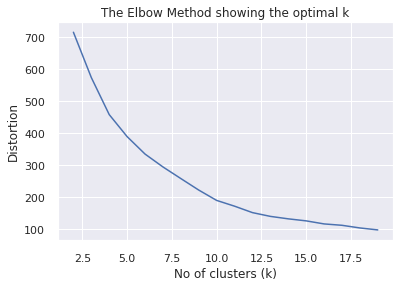

In [30]:
# k-means determine k
distortions = []
K = range(2, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Hierarchical Clustering or Agglomerative clustering.

In [31]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(df)
clustering

AgglomerativeClustering()

In [32]:
clustering.labels_

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1])

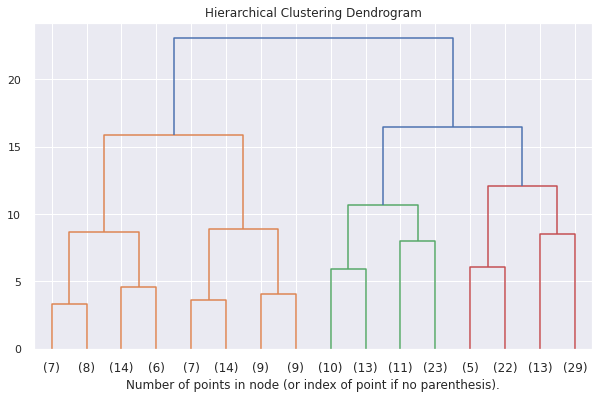

In [33]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)

plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Part 2

In [34]:
x = s.iloc[:,[3,4]].values

Using the elbow method to find the optimal number of clusters

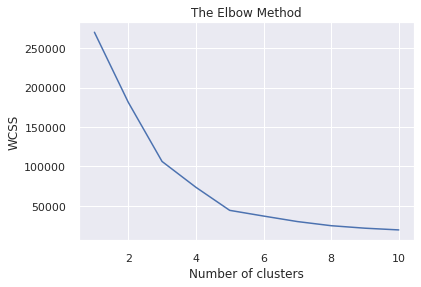

In [35]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


training the K-Means model on the dataset :

In [36]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state=42 )
y_kmeans = kmeans.fit_predict(x)

Visualising the clusters

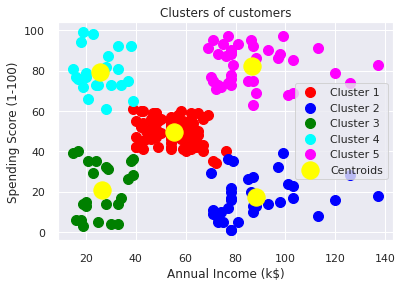

In [37]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [38]:
import plotly.express as px
fig = px.scatter_3d(s,x="Gender",y="Age",z="Spending Score (1-100)",color="Age")
fig.show()

# Part 3

In [39]:
from scipy.spatial.distance import cdist, pdist

from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, ward, complete, average

from sklearn.cluster import DBSCAN #Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

from sklearn.preprocessing import StandardScaler

In [40]:
s.sample()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
166,167,Male,42,86,20


In [41]:
s.rename(columns = {'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace = True)

In [42]:
s.sample()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
65,66,Male,18,48,59


In [43]:
mall_clust = s[['Annual_Income', 'Spending_Score']]

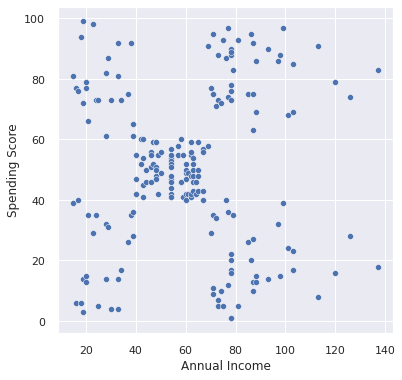

In [44]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', data = s)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show() 

Elbow Method; k-means clustering

Elbo method/clustering

In [45]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(mall_clust)
data_mall = mall_clust.copy()
data_mall['cluster'] = kmeans.labels_

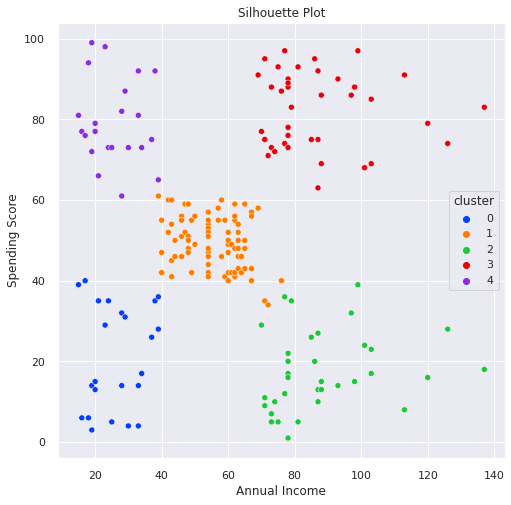

In [46]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', data = data_mall, hue = 'cluster', palette = 'bright')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Silhouette Plot')
plt.show()

Agglomerative Clustering

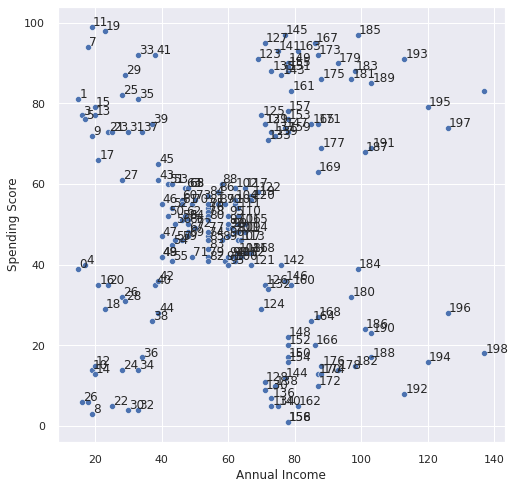

In [47]:
#Ploting a data into graph
plt.figure(figsize=(8,8))

sns.scatterplot(
    x= 'Annual_Income',
    y= 'Spending_Score',
    data= mall_clust
)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

for i,txt in enumerate(range(0, mall_clust.shape[0]-1)):
    plt.annotate(txt,(mall_clust['Annual_Income'][i]+0.3, mall_clust['Spending_Score'][i]+0.3), fontsize=12)

Dendrogram

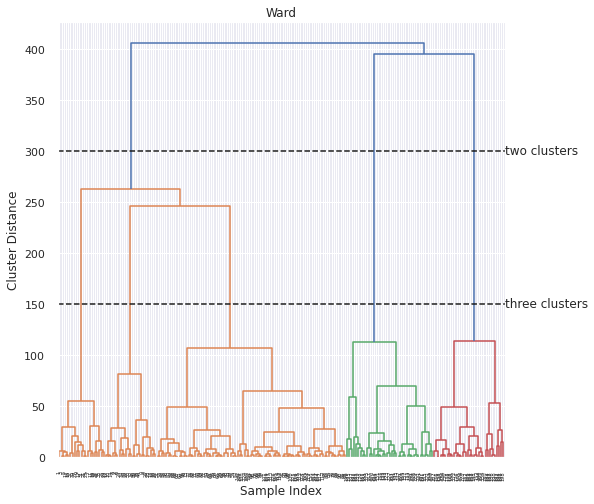

In [48]:
#Generate the linkage matrix
linkage_array = ward(mall_clust)

#Plotting setting
plt.figure(figsize = (8,8))
dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [300,300], '--', c = 'k')
ax.plot(bounds, [150,150], '--', c = 'k')

#Dividing clusters
ax.text(bounds[1], 300, 'two clusters', va = 'center', fontdict = {'size': 12})
ax.text(bounds[1], 150, 'three clusters', va = 'center', fontdict = {'size': 12})

plt.title('Ward')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()


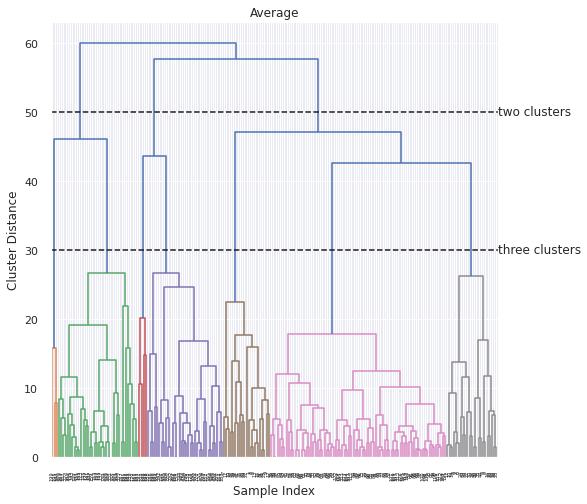

In [49]:
linkage_array = average(mall_clust)

#Plotting setting
plt.figure(figsize = (8,8))
dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [50,50], '--', c = 'k')
ax.plot(bounds, [30,30], '--', c = 'k')

#Dividing clusters
ax.text(bounds[1], 50, 'two clusters', va = 'center', fontdict = {'size': 12})
ax.text(bounds[1], 30, 'three clusters', va = 'center', fontdict = {'size': 12})

plt.title('Average')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

In [50]:
#Allocating dataset to each cluster
agg_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
mall_clust['ward'] = agg_ward.fit_predict(mall_clust)

agg_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
mall_clust['average'] = agg_ward.fit_predict(mall_clust)

agg_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
mall_clust['complete'] = agg_ward.fit_predict(mall_clust)

csv = mall_clust

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



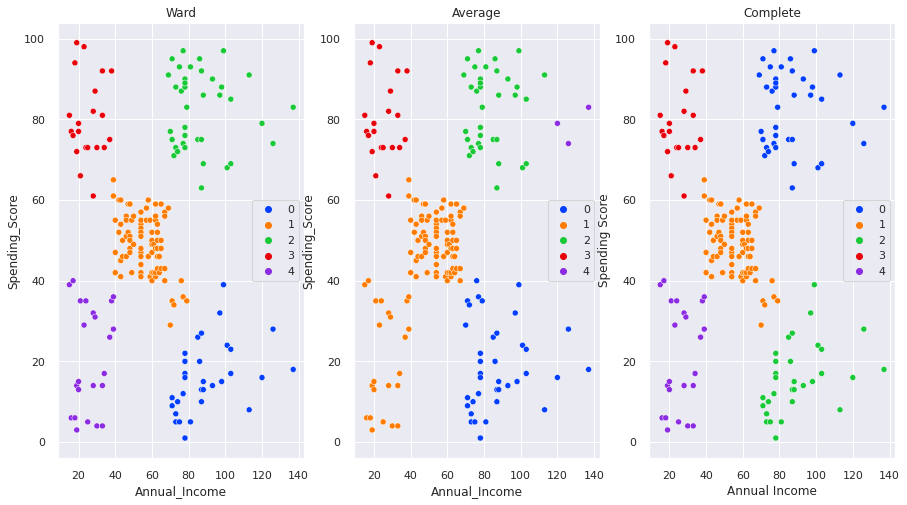

In [51]:
plt.figure(figsize = (15,8))
plt.subplot(1, 3, 1)
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', data = mall_clust, hue = 'ward', palette = 'bright')
plt.legend(loc = 5)
plt.title('Ward')
plt.subplot(1, 3, 2)
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', data = mall_clust, hue = 'average', palette = 'bright')
plt.legend(loc = 5)
plt.title('Average')
plt.subplot(1, 3, 3)
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', data = mall_clust, hue = 'complete', palette = 'bright')
plt.legend(loc = 5)
plt.title('Complete')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [52]:
cluster_name = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
color = ['Blue', 'Orange', 'Green', 'Red', 'Purple']
ward_list = ['High Income VS Low Spending', 'Medium Income VS Medium Spending', 'High Income  VS High Spending',
             'Low Income VS High Spending', 'Low Income VS Low Spending']
avg_list = ['High Income VS Low Spending', 'Medium Income VS Medium Spending', 'High Income  VS High Spending',
            'Low Income VS High Spending', 'Highest Income VS Highest Spending']
comp_list = ['High Income VS High Spending', 'Medium Income VS Medium Spending', 'High Income  VS Low Spending',
             'Low Income VS High Spending', 'Low Income VS Low Spending']
summary = pd.DataFrame({'Color': color, 'Name': cluster_name, 'Ward': ward_list,
                        'Average': avg_list, 'Complete': comp_list})
summary

,Color,Name,Ward,Average,Complete
0,Blue,Cluster 0,High Income VS Low Spending,High Income VS Low Spending,High Income VS High Spending
1,Orange,Cluster 1,Medium Income VS Medium Spending,Medium Income VS Medium Spending,Medium Income VS Medium Spending
2,Green,Cluster 2,High Income VS High Spending,High Income VS High Spending,High Income VS Low Spending
3,Red,Cluster 3,Low Income VS High Spending,Low Income VS High Spending,Low Income VS High Spending
4,Purple,Cluster 4,Low Income VS Low Spending,Highest Income VS Highest Spending,Low Income VS Low Spending


# Using DBSCAN

In [53]:
scaler = StandardScaler()
mall_clust_scaled = scaler.fit_transform(mall_clust)
dbscan = DBSCAN(eps = 0.2, min_samples = 10)
cluster = dbscan.fit_predict(mall_clust_scaled)

silhouette_score(mall_clust_scaled, cluster)

0.15960810971113076

Optimizing Minimum Sample And Epsilon

In [54]:
for eps in [i/10 for i in range(2,6)]:
    for min_samples in range (6,10):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(mall_clust_scaled)
        score = silhouette_score(mall_clust_scaled, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


eps 0.2
\min samples 6
clusters present: [-1  0  1  2  3]
clusters sizes: [95 78 10  9  8]
Silhouette Score: 0.21058388405704023

eps 0.2
\min samples 7
clusters present: [-1  0  1  2  3]
clusters sizes: [100  78   8   7   7]
Silhouette Score: 0.17192229884153776

eps 0.2
\min samples 8
clusters present: [-1  0  1]
clusters sizes: [116  76   8]
Silhouette Score: 0.1325086520016391

eps 0.2
\min samples 9
clusters present: [-1  0]
clusters sizes: [128  72]
Silhouette Score: 0.166964481083996

eps 0.3
\min samples 6
clusters present: [-1  0  1  2  3  4  5  6]
clusters sizes: [50 10  6 79 26 14  6  9]
Silhouette Score: 0.3181825368657497

eps 0.3
\min samples 7
clusters present: [-1  0  1  2  3]
clusters sizes: [75 10 79 24 12]
Silhouette Score: 0.303225574665744

eps 0.3
\min samples 8
clusters present: [-1  0  1  2  3  4]
clusters sizes: [75 10 79 12 12 12]
Silhouette Score: 0.2689188876210424

eps 0.3
\min samples 9
clusters present: [-1  0  1  2  3]
clusters sizes: [89 79 12 10 10]
S

In [55]:
#Final Result DBSCAN

In [56]:
dbscan = DBSCAN(eps = 0.4, min_samples = 8)
labels = dbscan.fit_predict(mall_clust_scaled)
mall_clust['cluster'] = labels

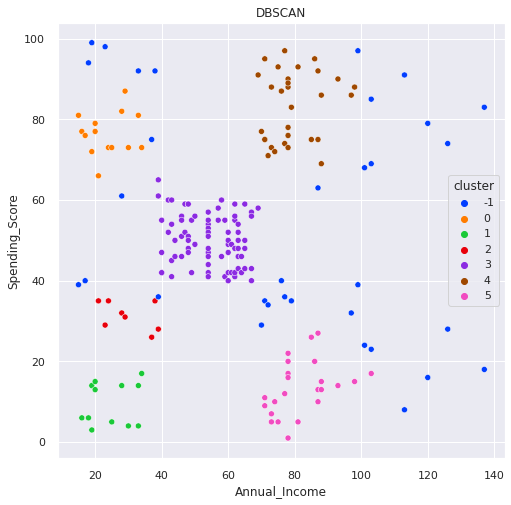

In [57]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', data = mall_clust, hue = 'cluster', palette = 'bright')
plt.title('DBSCAN')
plt.show()

In [58]:
cluster_name = ['Cluster -1', 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
color = ['Blue', 'Orange', 'Green', 'Red', 'Purple', 'Brown']
vs_list = ['Noise', 'Low Income VS High Spending', 'Lowest Income  VS Lowest Spending',
           'Medium Income VS Medium Spending', 'High Income VS Highest Spending',
           'High Income VS Low Spending']
dbscan_summary = pd.DataFrame({
    'Color': color,
    'Cluster DBSCAN': cluster_name,
    'Annual Income VS Spending Score': vs_list
})
dbscan_summary

,Color,Cluster DBSCAN,Annual Income VS Spending Score
0,Blue,Cluster -1,Noise
1,Orange,Cluster 0,Low Income VS High Spending
2,Green,Cluster 1,Lowest Income VS Lowest Spending
3,Red,Cluster 2,Medium Income VS Medium Spending
4,Purple,Cluster 3,High Income VS Highest Spending
5,Brown,Cluster 4,High Income VS Low Spending
